<a href="https://colab.research.google.com/github/anudeepreddyv/cs480student/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

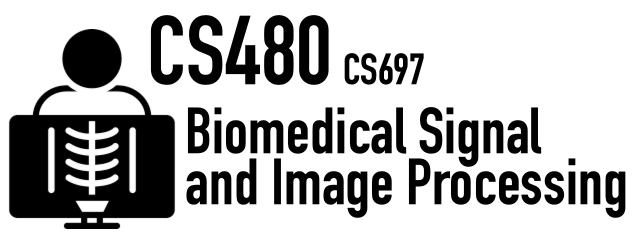
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.2 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [3]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.
!wget https://cs480.org/data/ct.zip

--2022-04-12 01:55:23--  https://cs480.org/data/ct.zip
Resolving cs480.org (cs480.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to cs480.org (cs480.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5847706 (5.6M) [application/zip]
Saving to: ‘ct.zip’

ct.zip              100%[===================>]   5.58M  --.-KB/s    in 0.08s   

2022-04-12 01:55:23 (70.2 MB/s) - ‘ct.zip’ saved [5847706/5847706]



In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
"""
Answer:
Dicom stores one slice as a single file, hence there are 220 slices as
there are 220 files present in the ct folder.
"""

'\nAnswer:\nDicom stores one slice as a single file, hence there are 220 slices as\nthere are 220 files present in the ct folder.\n'

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

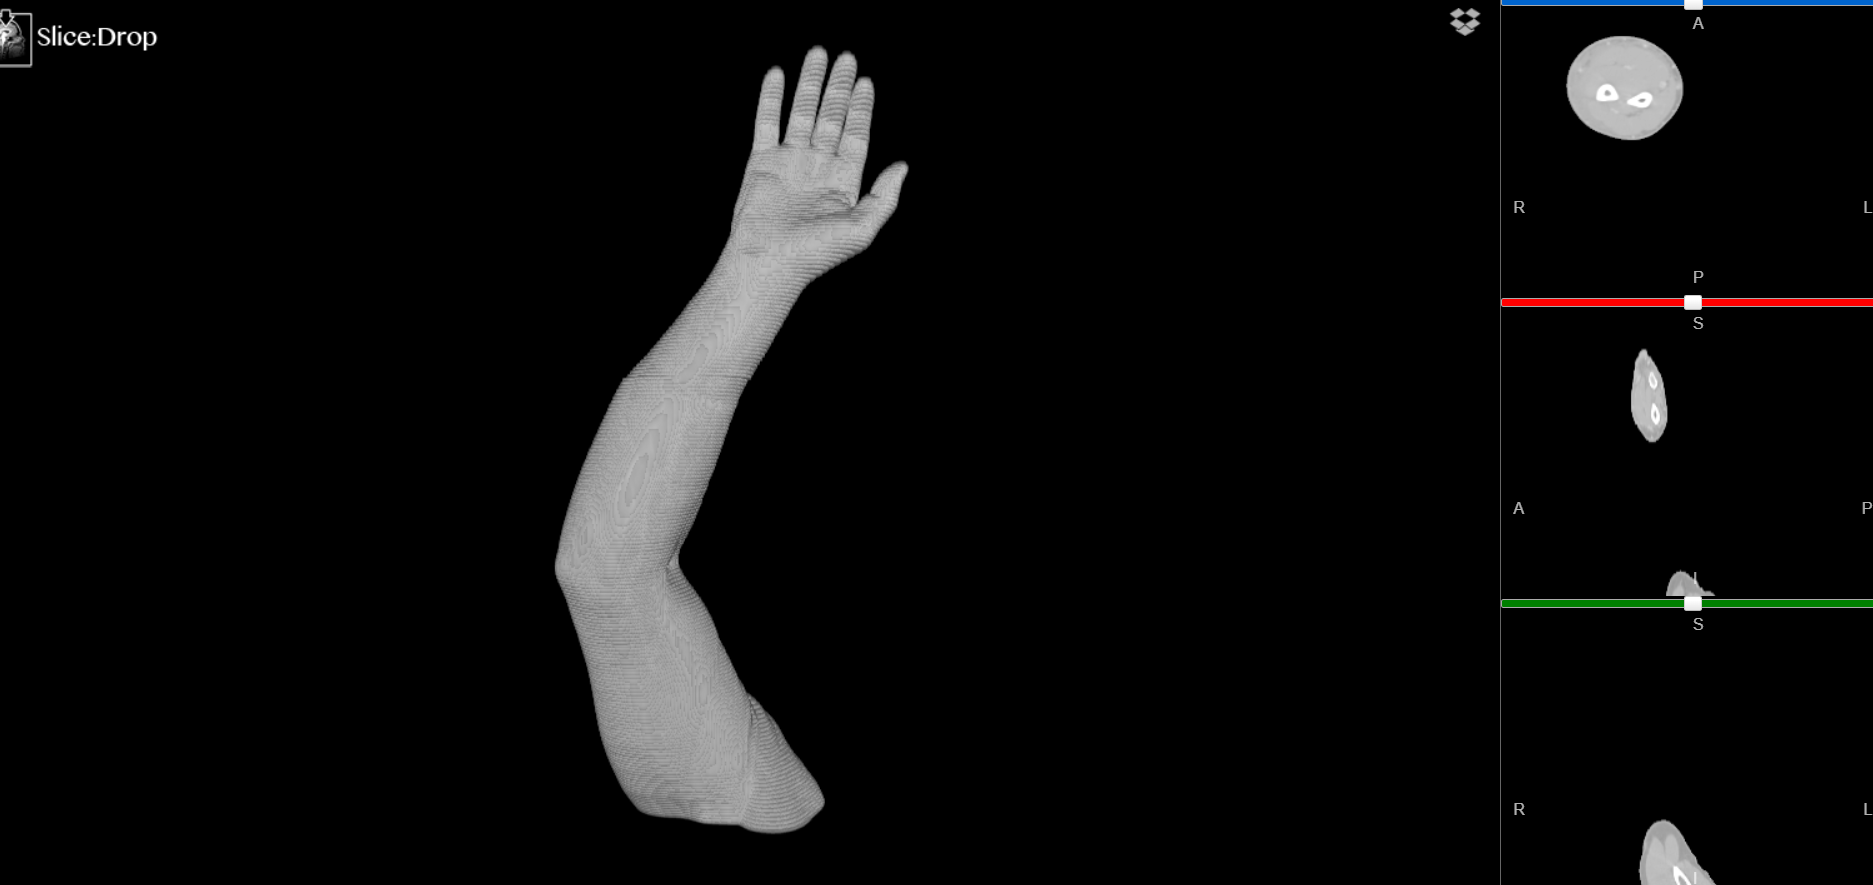

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [4]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [5]:
from pydicom import dcmread
import os
import numpy as np

In [6]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
file_names = sorted(os.listdir("ct"))
files=[]
for fname in file_names:
  files.append(dcmread("ct/"+fname))

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, 'SliceLocation'):
        slices.append(f)
    else:
        skipcount = skipcount + 1
# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# creating a 3d volume from the slices
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

#img3d is the 3D volume made out of reading all slices
print(img3d.shape)

(454, 512, 220)


In [7]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

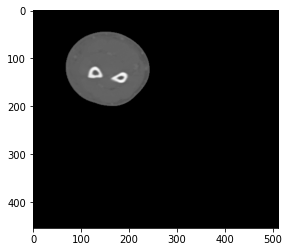

In [8]:
# TODO: YOUR CODE FOR AXIAL
plt.imshow(img3d[:, :, img_shape[2]//2], cmap='gray')

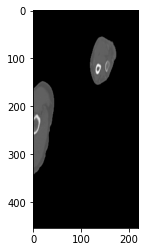

In [9]:
# TODO: YOUR CODE FOR SAGITTAL
plt.imshow(img3d[:,img_shape[1]//2 , :], cmap='gray')

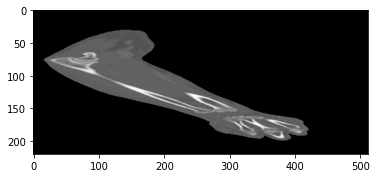

In [10]:
# TODO: YOUR CODE FOR CORONAL
# plt.imshow(img3d[img_shape[0]//2, :, :].T, cmap='gray')
plt.imshow(img3d[118, :, :].T, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [11]:
# TODO: YOUR CODE
img = img3d[:, :, 0]
slice = slices[0]
print(slice[0x0028,0x1050].keyword, "\t\t: ", slice[0x0028,0x1050].value)
print(slice[0x0028,0x1051].keyword, "\t\t: ", slice[0x0028,0x1051].value)
print(slice[0x0028,0x1052].keyword, "\t: ", slice[0x0028,0x1052].value)

WindowCenter 		:  30
WindowWidth 		:  410
RescaleIntercept 	:  -1024


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

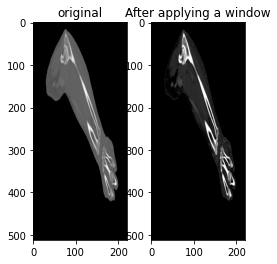

In [12]:
# TODO: YOUR CODE
def convert_to_hu(slice, px):
    # convert slice into hounsfield units
    intercept = slice.RescaleIntercept
    slope = slice.RescaleSlope
    hu_image = px * slope + intercept
    return hu_image

def apply_window(img, window_center, window_width):
    # based on the center and width this function
    # will apply a window
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    windowed = img.copy()
    windowed[windowed < img_min] = img_min
    windowed[windowed > img_max] = img_max
    return windowed

# process the whole 3d volume
ct_windowed = np.zeros(img3d.shape)
for i in range(220):
  hu = convert_to_hu(slices[i], img3d[:,:,i])
  windowed = apply_window(hu, 400, 1000)
  ct_windowed[:, :, i] = windowed

# displaying a random slice
plt.subplot("131")
plt.title("original")
plt.imshow(img3d[118, :, :], cmap='gray')
plt.subplot("132")
plt.title("After applying a window")
plt.imshow(ct_windowed[118,:,:], cmap='gray')


In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER
"""
Tissue density is quantified as Hounsfield Units(HU).
Scale varies from -1000 for air to +1000 bone with 0 corresponding to water.
The general variation of order would be Air<Fat<Fluid<Softtissue<Bone<Metal.
Hence for bone, window center can be at HU=400 with a width of 1000, whereas
for soft tissue it would be 50 and 250 respectively.
"""

'\nTissue density is quantified as Hounsfield Units(HU).\nScale varies from -1000 for air to +1000 bone with 0 corresponding to water.\nThe general variation of order would be Air<Fat<Fluid<Softtissue<Bone<Metal.\nHence for bone, window center can be at HU=400 with a width of 1000, whereas\nfor soft tissue it would be 50 and 250 respectively.\n'

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

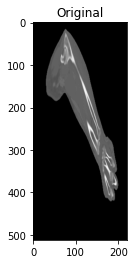

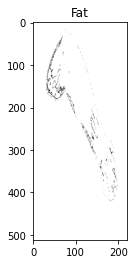

In [13]:
# TODO: YOUR CODE TO SEGMENT FAT
def segment(img, window_center, window_width):
    # calculate threshold values
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    mask = img.copy()
    # creating mask
    mask[mask < img_min] = 0
    mask[mask > img_max] = 0
    mask[mask != 0] = 1
    mask = mask.astype(int)
    segmented_image = mask * img
    return segmented_image, mask

ct_seg = np.zeros(img3d.shape)
ct_mask = np.zeros(img3d.shape)
#fat
for i in range(220):
  hu = convert_to_hu(slices[i], img3d[:,:,i])
  seg, mask = segment(hu, -50, 40)
  ct_seg[:, :, i] = seg
  ct_mask[:, :, i] = mask

plt.imshow(img3d[118,:,:], cmap='gray')
plt.title('Original')
plt.show()

plt.imshow(ct_seg[118,:,:], cmap='gray')
plt.title('Fat')
plt.show()

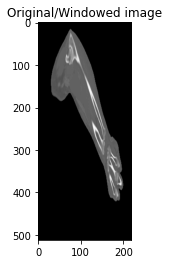

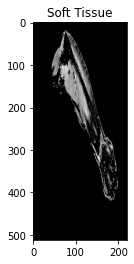

In [14]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
for i in range(220):
  hu = convert_to_hu(slices[i], img3d[:,:,i])
  seg, mask = segment(hu, 50, 100)
  ct_seg[:, :, i] = seg
  ct_mask[:, :, i] = mask

plt.imshow(img3d[118,:,:], cmap='gray')
plt.title('Original/Windowed image')
plt.show()

plt.imshow(ct_seg[118,:,:], cmap='gray')
plt.title('Soft Tissue')
plt.show()

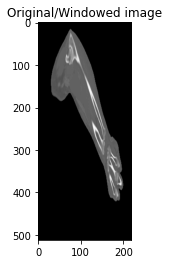

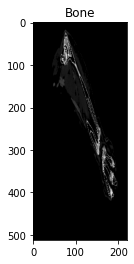

In [15]:
# TODO: YOUR CODE TO SEGMENT BONES
for i in range(220):
  hu = convert_to_hu(slices[i], img3d[:,:,i])
  seg, mask = segment(hu, 400, 700)
  ct_seg[:, :, i] = seg
  ct_mask[:, :, i] = mask

plt.imshow(img3d[118,:,:], cmap='gray')
plt.title('Original/Windowed image')
plt.show()

plt.imshow(ct_seg[118,:,:], cmap='gray')
plt.title('Bone')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
"""
Currently segmentation is fairly good but not yet perfect enough. Since we are
hardcoding threshold HU values, segmentation quality depends on the values we 
choose by trial and error.
"""

'\nCurrently segmentation is fairly good but not yet perfect enough. Since we are\nhardcoding threshold HU values, segmentation quality depends on the values we \nchoose by trial and error.\n'

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#           \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""



#In Collaboration with Sai Deepthi Maganti